# TP n°1 du module 4 : Le travail sur les données pour le _Machine Learning_.

Dans ce TP, nous allons explorer plus en détails le jeu de données du Titanic.

## Objectifs :
- Analyser des statistiques pour décrire les données
- Produire des visualisations pertinentes pour la compréhesion des données.
- Nettoyer le jeu de données
- Préparer les données pour qu'elles soient prêtes à être fournies à un algorithme d'apprentissage.

In [46]:
from unittest.mock import inplace

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.conftest import axis_1

Commencez par recharger le jeu de données depuis un csv dans un dataframe Pandas. Rappel de l'adresse à laquelle vous pouvez le trouver : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [47]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

## 1 - Exploration du jeu de données

Commencez par répondre au question suivante. Prenez le temps de bien analyser vos réponses, afin de mieux vous familiariser avec le contenu du jeu de données.

### Question n°1
Combien de données dans le jeu de données Titanic ?

In [48]:
titanic.shape[0]

891

### Question n°2
Combien d'attributs compte le jeu de données ?

In [49]:
titanic.shape[1]
len(titanic.columns)

12

### Question n°3
Identifiez quelles colonnes contiennent des données _discrètes_, et lesquelles contiennent des données _continues_.

#### Réponses
- Données _discrètes_ : `Données discrètes : PassengerId, Name, Pclass, Sex, Ticket, Survived, SibSp, Parch, Cabin, Embarked = 10`
- Données _continues_ : `Données continues : Fare, Age = 2`

### Question n°4
De la même manière, identifiez les colonnes de données _qualitatives_, et celles de données _quantitatives_.

#### Réponses
- Données _qualitatives_ : `Survived, Name, Cabin, Embarked, Ticket, Sex  =  6`
- Données _quantitatives_ : `PassengerId, SibSp, Parch, Age, Pclass, Fare = 6`

### Question n°5
Affichez les statistiques de base sur les colonnes _quantitatives_ du _DataSet_. 
- Quelles informations pouvez-vous en retirer ?
- Pour chaque attribut, cherchez au moins une information pertinente, que vous pouvez déduire de vos observations.

In [50]:
quantitatives = titanic[['Survived', 'Pclass', 'Embarked', 'Age', 'Fare', 'SibSp', 'Parch']]
quantitatives.describe()

print("Survived = au moins 50 % des gens sont morts")
print("Pclass = au moins 75 % des gens étaient en 3ème classe")
print("Age = L'age moyen est de 28 ans")
print("Fare = Un passager a eu son ticket gratuit")
print("SibSp = Au moins 75% des passagers voyagaient avec un conjoint ou fraterie")
print("Parch = Peu d'enfants")

Survived = au moins 50 % des gens sont morts
Pclass = au moins 75 % des gens étaient en 3ème classe
Age = L'age moyen est de 28 ans
Fare = Un passager a eu son ticket gratuit
SibSp = Au moins 75% des passagers voyagaient avec un conjoint ou fraterie
Parch = Peu d'enfants


#### Observations sur les statistiques

`à compléter`

### Question n°6
Sur une figure avec 6 sous-figures, proposez un histogramme pour visualiser la répartition des valeurs sur les attributs suivants :<br/>
`Survived`, `Pclass`, `Sex`, `Embarked`, `Age`, `Fare`.

Pour chaque figure, quelle(s) observation(s) pouvez-vous faire ?

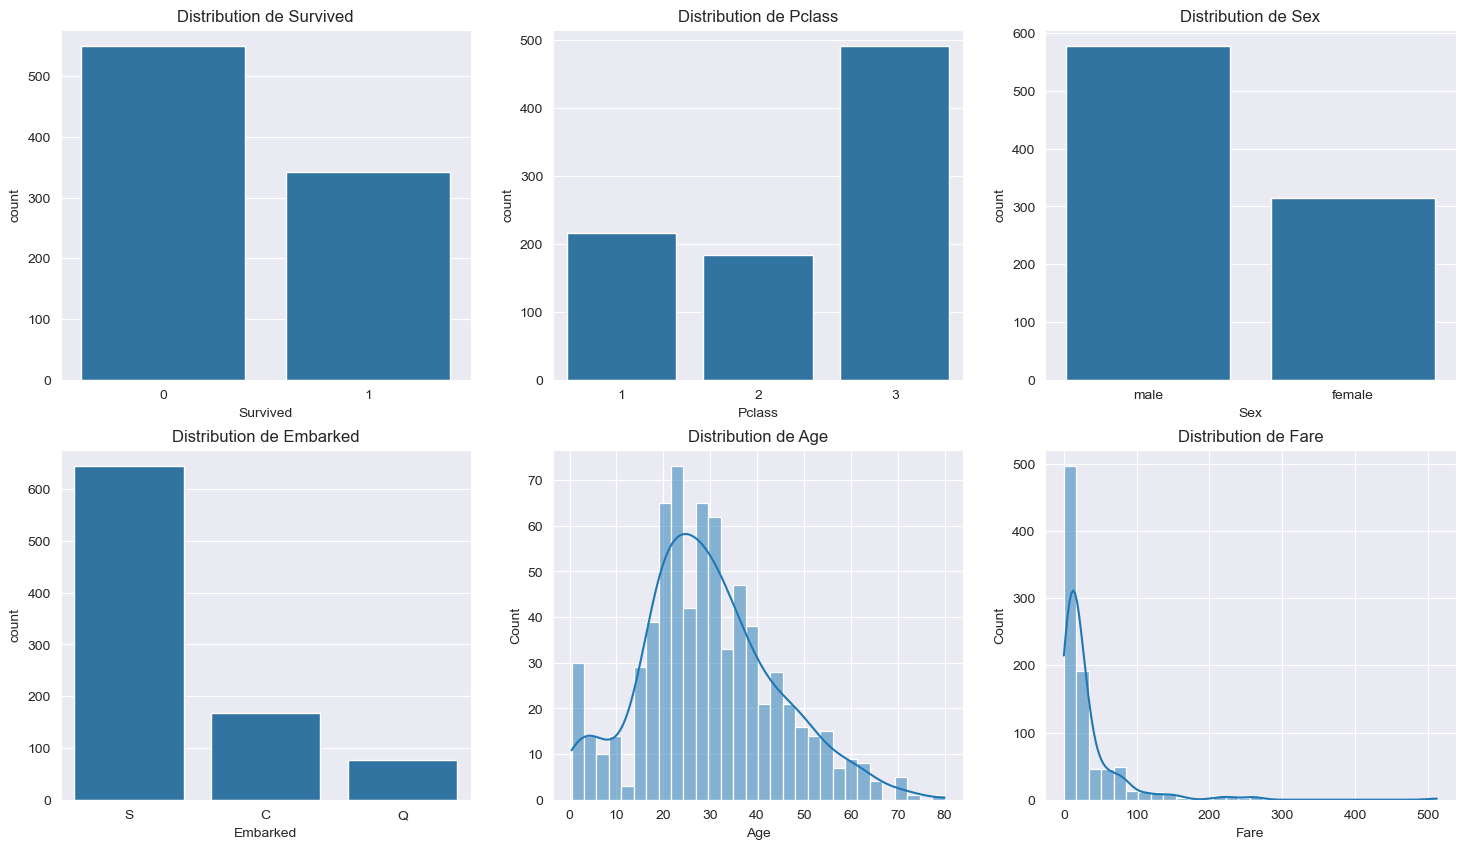

In [51]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Age', 'Fare']
# Pour savoir si countplot (catégoriel) ou histplot (numérique)
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

for i, col in enumerate(cols):
    ax = axes[i // 3, i % 3]
    if col in cat_cols:
        sns.countplot(data=titanic, x=col, ax=ax)
    else:
        sns.histplot(data=titanic, x=col, kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution de {col}')


#### Observations

1. `Plus de morts que de survivants`
2. `Plus de 3 ème classe`
3. `Plus d'hommes`
4. `Plus de passgers à S`
5. `Moyenne d'age 25 ans`
6. `Majorité des billets en dessous de 25$`

### Question n°7
Sur un même graphique, représentez, pour chaque genre, le nombre de personnes ayant survécu.
- Que pouvez-vous en déduire ?
- Le genre d'un passager vous parait-il pertinent pour qu'un modèle d'apprentissage puisse prédire si celui-ci a survécu ?

Text(0, 0.5, 'Nombre de passagers')

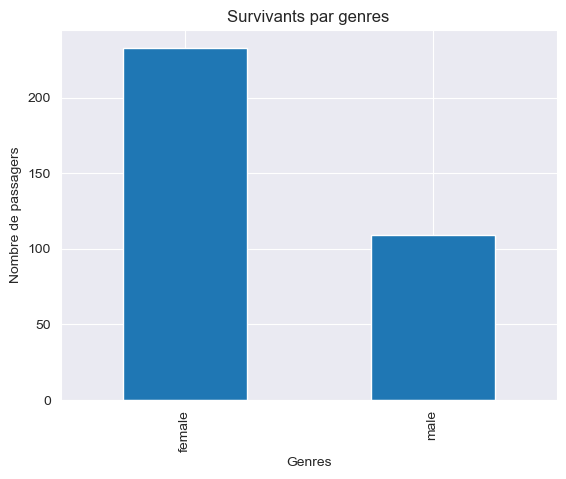

In [52]:
survivors = titanic[titanic['Survived'] == 1]
grouped = survivors.groupby(['Sex']).size()
grouped.plot(kind='bar')

plt.title('Survivants par genres')
plt.xlabel('Genres')
plt.ylabel('Nombre de passagers')


#### Observations

`Les femmes ont davatanges survecu mais ce n'est pas pertinent d'utiliser cette donnée`

### Question n°8
En vous basant sur une visualisation :
- Observez-vous une corrélation entre certains attributs ?
- Que pouvez-vous en déduire pour un futur modèle d'apprentissage ?

<Axes: >

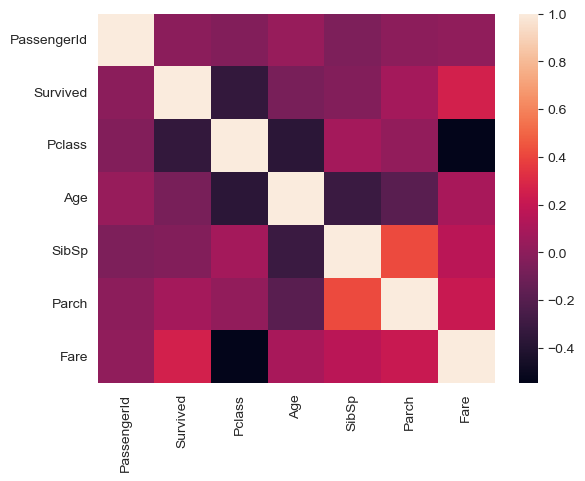

In [53]:
sns.heatmap(titanic[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr())

#### Observations

`à compléter`

### Question n°9
En vous basant sur vos observations de la visualisation précédente :
- Confirmez vos impressions en proposant 2 visualisations ?

Par exemple, si vous avez observé une corrélation entre un attribut A et un attribut B :<br/>mettez en valeur le fait que les mêmes valeurs de A sont souvent trouvées avec les mêmes valeurs de B.

<Axes: xlabel='Pclass', ylabel='count'>

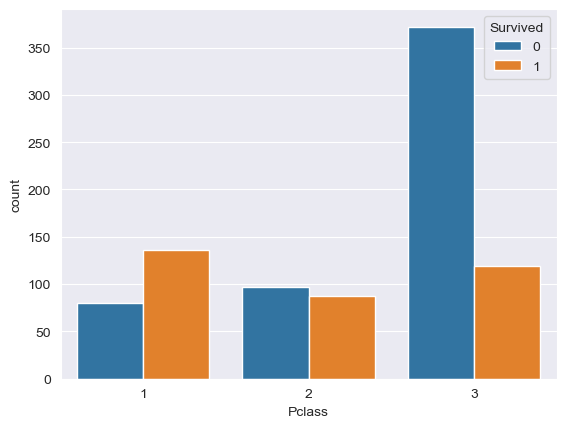

In [54]:
# Proposition n°1 :
sns.countplot(data = titanic, x="Pclass", hue="Survived")

#### Observations n°1

`à compléter`

<Axes: xlabel='Age', ylabel='Count'>

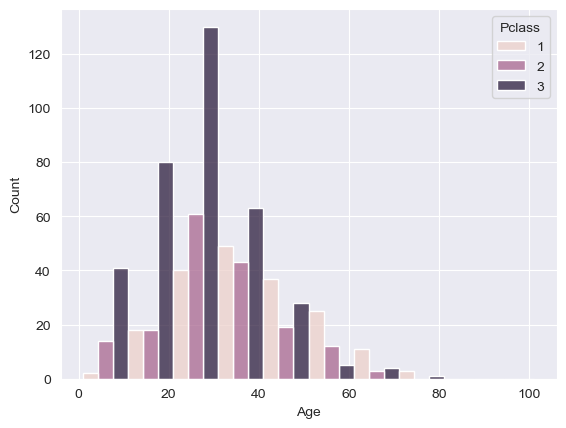

In [55]:
# Proposition n°2 :
sns.histplot(data=titanic, x='Age', hue='Pclass', multiple='dodge', bins=range(1, 110, 10))

#### Observations n°2

`à compléter`

### Question n°10
Mettez-vous à présent dans le rôle d'un data analyst face à un _nouveau jeu de données_ :
- Quelles autres visualisations vous paraissent nécessaires ?
- Proposez au moins 3 visualisations qui vous semblent pertinentes.
- Gardez en tête que l'objectif sur ce jeu de données sera de réussir à prédire si un passager à survécu ou non.

#### Suggestion de visualisations

1. `Survie par classe d'age`
2. `Suivi et nombre de membres de la famille`
3. `Age et tarif du ticket`

## 2 - Nettoyage des données

### Question n°1
Pour chaque colonne, comptez le nombre de valeurs nulles.

In [56]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Traitement du port d'embarquement**

### Question n°2
Les valeurs manquantes du port d'embarquement sont très peu nombreuses.

De plus, s'agissant d'un attribut discret, nous pouvons considérer l'information de valeur nulle comme une valeur possible supplémentaire.<br/>Commencez par afficher les lignes pour lesquelles le port d'embarquement n'est pas renseigné.

In [57]:
embarked_null = titanic[titanic['Embarked'].isnull()]
embarked_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Question n°3
Remplacez ces valeurs nulles par la valeur 'U' (pour _Unknown_).

Vérifiez vos résultats en réaffichant les lignes obtenues ci-dessus :

In [69]:
titanic.loc[titanic['Embarked'].isnull(), ['Embarked']] = 'U'
titanic[titanic['Embarked'] == 'U']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,U
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,U


**Traitement du numéro de cabine**

### Question n°4
Le numéro de cabine est l'attribut qui contient le plus de valeurs nulles.

Cet attribut n'a pas de lien évident avec la survie des passagers :<br/>Supprimer cette colonne dans votre _DataFrame_.

In [59]:
titanic.drop(axis=1,labels='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Traitement de l'âge**
### Question n°5
L'âge est un attribut plus délicat à traiter : il contient un nombre conséquent de valeur nulle, mais il est très pertinent à prendre en compte pour la prédiction de la survie d'un passager, ces deux informations étant assez fortement corrélées.

Il existe plusieurs stratégies pour remplacer ces valeurs manquantes :
- Mettre une valeur aléatoire (entre le min et le max)
- Remplacer par la moyenne
- **Remplacer par une valeur déterminée en fonction des autres paramètres (classe, age, …)**

Commencer par calculer pour chaque genre et pour chaque classe, l'âge moyen (6 valeurs à obtenir au total).

In [73]:
age_avg_pclass_sex = titanic.groupby(['Pclass', 'Sex'], as_index=False)['Age'].mean()
age_avg_pclass_sex

,Pclass,Sex,Age
0,1,female,34.611765
1,1,male,41.281386
2,2,female,28.722973
3,2,male,30.740707
4,3,female,21.750000
5,3,male,26.507589


### Question n°6
Pour chaque ligne du jeu de données, si l'âge est manquant :
- Remplacez la valeur nulle par une des valeurs calculées ci-dessus.<br/>(basez-vous sur le genre et la classe du passager pour choisir la bonne valeur.)

In [61]:
#TODO

In [62]:
#TODO

##### Vérification des valeurs manquantes

In [63]:
#TODO

## 3 - Préparer les données
Nous entrons dans la dernière phase de traitement des données :
- Nous allons terminer par la mise en forme de celles-ci, pour qu'elles soient prêtes à être manipulées dans un processus d'apprentissage.

**Encodage des données catégorielles**

### Question n°1
Réaffichez les infos sur le jeu de données. Vous devez avoir 11 colonnes, toutes remplies avec 891 valeurs.

In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Question n°2
Il y a 3 colonnes qui sont liées à l'identification unique d'un passager, et ne sont pas pertinentes pour la prédiction de la survie.

Supprimez ces 3 colonnes de votre jeu de données.

In [77]:
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.info()

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

### Question n°3
Reproduisez une manipulation vue au module 3 :
- Combinez 2 colonnes relatives aux familles de passagers (`FamilyMembers`), pour n'en faire plus qu'une seule.
- Pensez à supprimer les 2 anciennes colonnes.

In [81]:
titanic['FamilyMembers'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)



KeyError: 'SibSp'

### Question n°4
Parmi les colonnes restantes, sur lesquelles un encodage one-hot vous semble pertinent ?

- En vous appuyant sur [la documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), appliquez cet encodage aux colonnes identifiées.
- Enfin, pensez à supprimer les anciennes colonnes.

_Note : pour le genre, il n'y a que 2 possibilités dans ce jeu de données.<br/>Avec l'option `if_binary` de l'encodeur, vous pouvez ne générer qu'une seule colonne (l'autre s'obtenant immédiatement par déduction)._

In [67]:
#TODO

### Question n°5
Vous devez à présent avoir un jeu de données sur 10 attributs, tous numériques (`int64` ou `float64`), sans aucune valeur nulle.

- Enregistrer ce jeu de données au format csv, afin de pouvoir le réutiliser par la suite.

_N.B. : Il est inutile de sauvegarder l'index présent dans le DataFrame._

In [68]:
#TODO

# Fin du TP !